# Wine Quality Prediction

# Part 1: Import libraries

In [1]:
# 10890402
# Jeremy (蕭智強)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import streamlit as st

from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree

pd.set_option('display.max_columns', 100)


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: C:\Users\jerem\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: C:\Users\jerem\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


## Part 2: Load data into a dataframe and do some basic data exploration

In [2]:
print('Part 2: Load data into a dataframe and do some basic data exploration')
# 2.1. Load data into a dataframe and print the first 5 rows
print('2.1. Load data into a dataframe and print the first 5 rows')
df = pd.read_csv('winequality-white.csv', sep=';')
print(df.head(5))
print("-" * 100)

# 2.2. Check the data types of the columns
print('2.2. Check the data types of the columns')
print(df.dtypes)
print("-" * 100)

# 2.3. Check the number of rows and columns in the dataframe
print('2.3. Check the number of rows and columns in the dataframe')
print(df.shape)
print("-" * 100)

# 2.4. Check the descriptive statistics of the dataframe
print('2.4. Check the descriptive statistics of the dataframe')
print(df.describe())
print("-" * 100)

Part 2: Load data into a dataframe and do some basic data exploration
2.1. Load data into a dataframe and print the first 5 rows
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0          

## Part 3: Exploratory Data Analysis (EDA) of the data

### 3.1. Bar charts

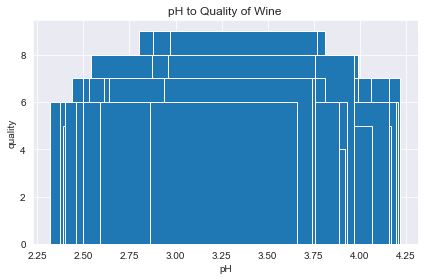

In [3]:
plt.bar(df['pH'], df['quality'])
plt.xlabel('pH')
plt.ylabel('quality')
plt.title('pH to Quality of Wine')
plt.tight_layout()
plt.show()

### 3.2. Histograms

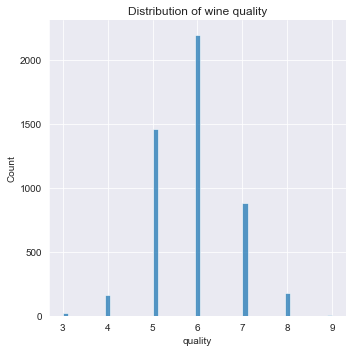

In [4]:
sns.displot(df['quality'])
plt.title("Distribution of wine quality")
plt.tight_layout()
plt.show()

### 3.3. Box plots

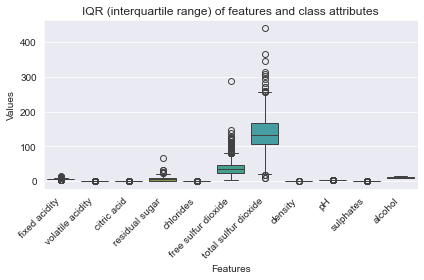

In [5]:
sns.boxplot(data=df.drop(columns=['quality']))
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('IQR (interquartile range) of features and class attributes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 3.4. Scatter plots

#### 3.4.1. Scatter plot of alcohol vs. quality

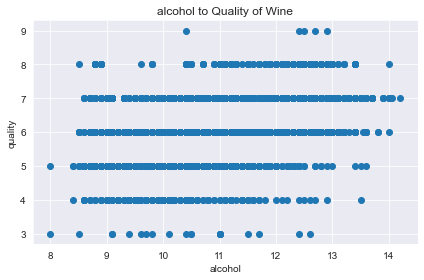

In [6]:
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.title('alcohol to Quality of Wine')
plt.tight_layout()
plt.show()

#### 3.4.2. Scatter plot of density vs. quality

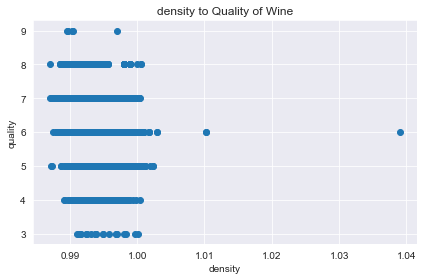

In [7]:
plt.scatter(df['density'], df['quality'])
plt.xlabel('density')
plt.ylabel('quality')
plt.title('density to Quality of Wine')
plt.tight_layout()
plt.show()

#### 3.4.3. Scatter plot of pH vs. quality

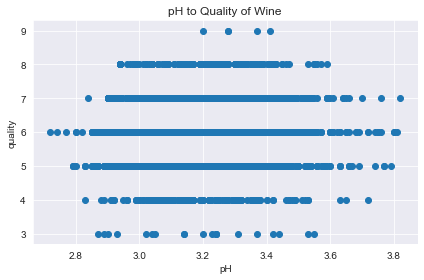

In [8]:
plt.scatter(df['pH'], df['quality'])
plt.xlabel('pH')
plt.ylabel('quality')
plt.title('pH to Quality of Wine')
plt.tight_layout()
plt.show()

#### 3.4.4. Scatter plot of fixed acidity vs. quality

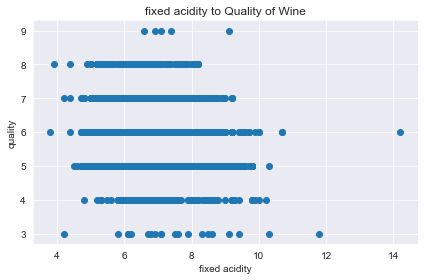

In [9]:
plt.scatter(df['fixed acidity'], df['quality'])
plt.xlabel('fixed acidity')
plt.ylabel('quality')
plt.title('fixed acidity to Quality of Wine')
plt.tight_layout()
plt.show()

### 3.5. Correlation matrix

In [10]:
print('3.5. Correlation matrix')
corr = df.corr()
print(corr)

3.5. Correlation matrix
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur diox

### 3.6. Heatmap

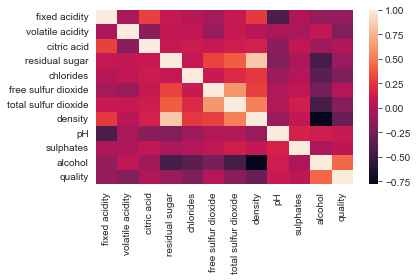

In [11]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.tight_layout()
plt.savefig("2.6. Heat Map.svg")
plt.show()

### 3.7. Clean the Dataset

#### 3.7.1. Remove unnecessary columns

In [29]:
df_cleaned = df.drop(columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density'])

In [30]:
df_cleaned

,pH,sulphates,alcohol,quality
0,3.00,0.45,8.8,6
1,3.30,0.49,9.5,6
2,3.26,0.44,10.1,6
3,3.19,0.40,9.9,6
4,3.19,0.40,9.9,6
...,...,...,...,...
4893,3.27,0.50,11.2,6
4894,3.15,0.46,9.6,5
4895,2.99,0.46,9.4,6
4896,3.34,0.38,12.8,7


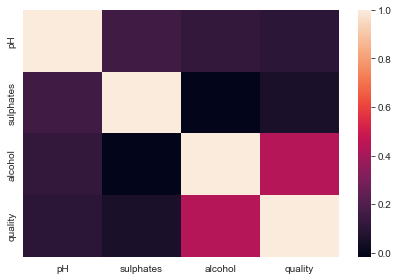

In [31]:
corr = df_cleaned.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.tight_layout()
plt.show()

## Part 4: Build and train the machine learning models

### 4.1. Split the data into training and testing sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop(columns=['quality']), df_cleaned['quality'], test_size=0.2, random_state=8)
print("x_train shape:", X_train.shape) # (3918, 11)
print("y_train shape:", y_train.shape) # (3918,)
print("x_test shape:", X_test.shape) # (980, 11)
print("y_test shape:", y_test.shape) # (980,)

x_train shape: (3918, 3)
y_train shape: (3918,)
x_test shape: (980, 3)
y_test shape: (980,)


### 4.2. Build and train KNN, Naive Bayes, SVM and Decision Tree models

#### 4.2.1. KNN

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### 4.2.2. Naive Bayes

In [34]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

#### 4.2.3. SVM

In [42]:
SVM = svm.SVC()
SVM.fit(X_train, y_train)

AttributeError: 'SVC' object has no attribute 'SVC'

#### 4.2.4. Decision Tree

In [37]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

## Part 5: Evaluate the models

### 5.1. Evaluate the models using the test data

#### 5.1.1. KNN

In [38]:
knn_pred = knn.predict(X_test)
print(classification_report(y_test, knn_pred))
print("MCC:", matthews_corrcoef(y_test, knn_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        31
           5       0.51      0.59      0.55       295
           6       0.55      0.60      0.57       445
           7       0.53      0.41      0.46       168
           8       0.33      0.14      0.20        36
           9       0.00      0.00      0.00         2

    accuracy                           0.52       980
   macro avg       0.28      0.25      0.25       980
weighted avg       0.51      0.52      0.51       980

MCC: 0.26731368021506585
Confusion Matrix:
[[  0   0   1   2   0   0   0]
 [  0   0  12  15   3   1   0]
 [  0   2 175 109   7   2   0]
 [  1   7 128 265  41   3   0]
 [  0   1  21  73  69   4   0]
 [  0   0   3  18  10   5   0]
 [  0   0   0   2   0   0   0]]


C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### 5.1.2. Naive Bayes

In [39]:
nb_pred = nb.predict(X_test)
print(classification_report(y_test, nb_pred))
print("MCC:", matthews_corrcoef(y_test, nb_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        31
           5       0.48      0.62      0.54       295
           6       0.51      0.59      0.55       445
           7       0.55      0.29      0.38       168
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         2

    accuracy                           0.50       980
   macro avg       0.22      0.21      0.21       980
weighted avg       0.47      0.50      0.48       980

MCC: 0.2162210748350883
Confusion Matrix:
[[  0   0   2   1   0   0   0]
 [  0   0  12  17   2   0   0]
 [  0   0 182 111   2   0   0]
 [  0   0 161 261  22   1   0]
 [  0   0  19  99  49   1   0]
 [  0   0   5  17  14   0   0]
 [  0   0   0   2   0   0   0]]


C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### 5.1.3. SVM

In [40]:
svm_pred = svm.predict(X_test)
print(classification_report(y_test, svm_pred))
print("MCC:", matthews_corrcoef(y_test, svm_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred))

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- chlorides
- citric acid
- density
- fixed acidity
- free sulfur dioxide
- ...


#### 5.1.4. Decision Tree

In [43]:
dt_pred = dt.predict(X_test)
print(classification_report(y_test, dt_pred))
print("MCC:", matthews_corrcoef(y_test, dt_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.20      0.23      0.21        31
           5       0.62      0.61      0.61       295
           6       0.63      0.60      0.61       445
           7       0.49      0.52      0.50       168
           8       0.39      0.47      0.42        36
           9       0.00      0.00      0.00         2

    accuracy                           0.57       980
   macro avg       0.33      0.35      0.34       980
weighted avg       0.58      0.57      0.57       980

MCC: 0.3668703155633563
Confusion Matrix:
[[  0   0   0   2   1   0   0]
 [  0   7   8  11   5   0   0]
 [  3  10 180  87  15   0   0]
 [  2  11  89 267  64  12   0]
 [  1   4  13  48  87  14   1]
 [  0   3   1   9   6  17   0]
 [  0   0   1   0   0   1   0]]


### 5.2. Save the best model

In [21]:
joblib.dump(dt, 'wine_quality_model.pkl')

['wine_quality_model.pkl']

## Part 6: Predict the quality of wine

### 6.1. Load the model

In [22]:
model = joblib.load('wine_quality_model.pkl')

### 6.2. Predict the quality of wine using new data

In [23]:
new_data = np.array([[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8]])
print("Predicted wine quality:", model.predict(new_data))

Predicted wine quality: [6]


C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Part 7: Build a web application using Streamlit

In [24]:
st.title('Wine Quality Prediction')
st.write('This is a web application that predicts the quality of wine.')
st.write('Please enter the values of the features of the wine in the sidebar and click the "Predict" button to predict the quality of the wine.')
st.sidebar.header('User Input Parameters')

2023-12-05 17:00:34.012 
  command:

    streamlit run C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

In [25]:
for i in range (14,121):
    print("# {}th neuron in the hidden layer\nh{} = sigmoid(self.w133 * x[0] + self.w134 * x[1] + self.w135 * x[2] + self.w136 * x[3] + self.w137 * x[4] + self.w138 * x[5] + self.w139 * x[6] + self.w140 * x[7] + self.w141 * x[8] + self.w142 * x[9] + self.w143 * x[10] + self.b13)")

# {}th neuron in the hidden layer
h{} = sigmoid(self.w133 * x[0] + self.w134 * x[1] + self.w135 * x[2] + self.w136 * x[3] + self.w137 * x[4] + self.w138 * x[5] + self.w139 * x[6] + self.w140 * x[7] + self.w141 * x[8] + self.w142 * x[9] + self.w143 * x[10] + self.b13)
# {}th neuron in the hidden layer
h{} = sigmoid(self.w133 * x[0] + self.w134 * x[1] + self.w135 * x[2] + self.w136 * x[3] + self.w137 * x[4] + self.w138 * x[5] + self.w139 * x[6] + self.w140 * x[7] + self.w141 * x[8] + self.w142 * x[9] + self.w143 * x[10] + self.b13)
# {}th neuron in the hidden layer
h{} = sigmoid(self.w133 * x[0] + self.w134 * x[1] + self.w135 * x[2] + self.w136 * x[3] + self.w137 * x[4] + self.w138 * x[5] + self.w139 * x[6] + self.w140 * x[7] + self.w141 * x[8] + self.w142 * x[9] + self.w143 * x[10] + self.b13)
# {}th neuron in the hidden layer
h{} = sigmoid(self.w133 * x[0] + self.w134 * x[1] + self.w135 * x[2] + self.w136 * x[3] + self.w137 * x[4] + self.w138 * x[5] + self.w139 * x[6] + self.w140 * x[7